<a href="https://colab.research.google.com/github/mihika14/BlogAdmin/blob/master/heat_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

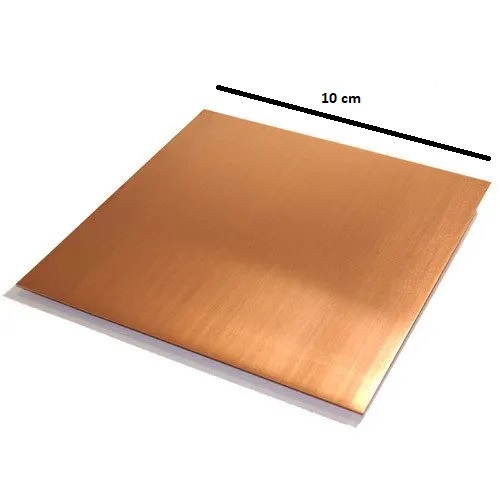

**The following code sample describes the solving a partial differential equation numerically. The equation evaluated in this case is the 2D heat equation.Look at a square copper plate with dimensions of 10 cm above.**

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

Set up the position and time grids (or axes)

In [ ]:
#Size of the 1D grid.
axis_size = 100     

#Length of one side of the square plate (cm)
side_length = 10   

#Space step
dx = side_length/axis_size 

#Spatial grid points for the plate.
axis_points = np.linspace(0,10,axis_size)  

Set up the time grid to calcuate the equation.

In [ ]:
#Total time (s)
T = 1.0         

#Thermal diffusivity of the plate in units of cm^2/s.
k = 1.011          

#Time step size to ensure a stable discretization scheme.
dt = ((1/axis_size)**2)/(2*k)        

#Total number of time steps.
n = int(T/dt)                              

#Set maximum initial temperature (in degrees Celsius)
max_temp = 100

## Initialization conditions for the 2D heat equation.

1) Set up initial temperature in the plate.  The initial temperature will be a Gaussian,

2) With the hottest temperature at the middle of the plate and it will be cooler at the edges.

In [ ]:
def temp_init(x,y,c,m_temp):
    return m_temp*np.exp(-((x-side_length/2)**2 + (y-side_length/2)**2)/c**2)

#Create a meshgrid for the 3D function of initial temperature.
X, Y = np.meshgrid(axis_points, axis_points)

#denominator in the Gaussian (proportional to standard deviation).
c = 2

#Calculate the initial plate temperature using the temperature initialization function.  This is the initial
#condition of the plate.
U = temp_init(X, Y, c, max_temp)

#Set up some boundary conditions at the edges of the plate for the initial plate condition at t = 0.
#Set plate edge temperatures in degrees Celsius.  The bottom edge is set to be quite hot in this case.
U[:,0] = 20
U[:,-1] = 5
U[0,:] = 10
U[-1,:] = 70

#Assign initial boundary conditions to their own variables.
B1 = U[:,0]
B2 = U[:,-1]
B3 = U[0,:]
B4 = U[-1,:]

**Initial temperature Map**

**Used the hot colormap to show the initial heat distribution.**

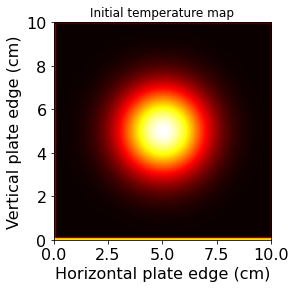

In [ ]:
plt.imshow(U, cmap ='hot', vmin = 0, vmax = max_temp, extent= [0,10,0,10])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Horizontal plate edge (cm)', fontsize = 16)
plt.ylabel('Vertical plate edge (cm)', fontsize = 16)
plt.title('Initial temperature map')
plt.show()

**Laplacian numerical approximation using 5-point stencil finite difference methods.**







In [ ]:
def laplacian(Z,d_ex):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / d_ex**2

**PDE for a result of all spatial positions after time T has elapsed.  Iterate over the specified time.**



In [ ]:
for i in range(n):

    #Perform the 3rd order differentiation on the function.
    deltaU = laplacian(U,dx)

    #Take the values of the function inside, but not including
    #the first and last elements.
    Uc = U[1:-1,1:-1]

    #Update the variables after rearranging the differential equation.
    U[1:-1,1:-1] = Uc + dt * (k*deltaU)

    #Direchlet boundary conditions.  The edges of the plate
    #have steady state, constant temperatures over all time.
    U[:,0] = B1
    U[:,-1] = B2
    U[0,:] = B3
    U[-1,:] = B4

**Show the new temperature distribution on the plate after the time has elapsed.  Used the hot colormap to show the heat distribution.**

Final Temperature Map

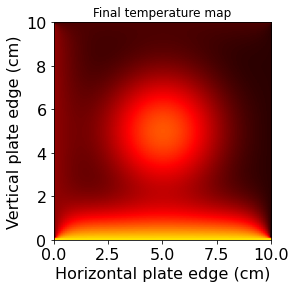

In [ ]:
plt.imshow(U,cmap = 'hot', vmin = 0, vmax = max_temp, extent= [0,10,0,10])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Horizontal plate edge (cm)', fontsize = 16)
plt.ylabel('Vertical plate edge (cm)', fontsize = 16)
plt.title('Final temperature map')
plt.show()